<a href="https://colab.research.google.com/github/spe301/ML-vs-DL/blob/main/TanzaniaWaterPumpMLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is part 1 of a 4 part series in which I test the preformance of deep learning models against more simple approaches. In this dataset we are working on the Tanzania water pumps problem in which we are able to predict which water pumps will need repair so we can properly deploy workers.

In [91]:
#A package I created that speeds up data preprocessing and modeling.
!pip install Potosnail==0.0.9

#The OSEMN Process

* Obtain: already done by kaggle.com
* Scrub: already done curtosey of Tatiana Snauwaert on Kaggle
* Explore: conduct a traditional EDA on the data and make vizulizations
* Model: test between Sklearn Models and Deep Learning Models
* Interpret

In [92]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import folium

EDA =  pd.read_csv('https://raw.githubusercontent.com/spe301/ML-vs-DL/main/data/Tanzania_Water_Pumps/train_df_after_EDA.csv')
EDA.head()

,id_x,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_y,status_group,label
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,2
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,2
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,2
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,2


# EDA Questions

1. Which  major funder, top 100 most common, has highest percentage of nonfunctional pumps?
2. is the difference in water pump functionality statisticy signifigant between commercially managed and group managed pumps?
3. What is the most reliable water source, this is measured by percentage of pumps that are fully functional and have 'good' water.
4. display the status of the pumps in geographic format.


In [93]:
funders = dict(EDA['funder'].value_counts()) #turning value counts into a dictionary so it's easier to work with
funders_df = pd.DataFrame(list(funders.keys())) #turning this into a pandas dataframe because pandas is faster than raw python
funders_df.columns = ['funder'] 
funders_df['count'] = list(funders.values())
funders_df = funders_df[:100] #taking the top 100
funders_list = list(funders_df['funder']) #getting the list of top 100 most common funders

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


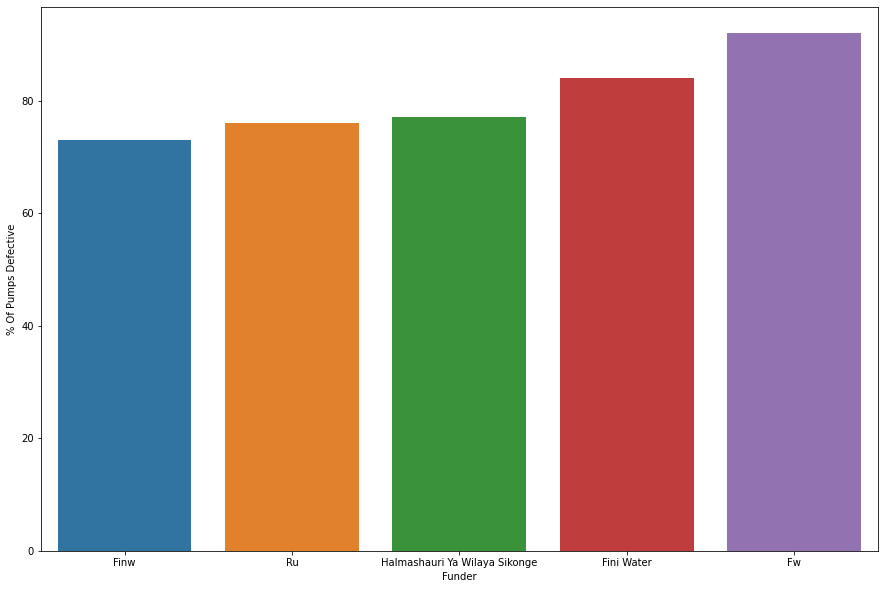

In [94]:
percentages = {}
for funder in funders_list:
  sample = EDA.loc[EDA['funder']==funder]
  defective = sample.loc[sample['label']==0]
  percentages[round((len(defective)/len(sample)), 2) * 100] = funder

top5 = []
for element in sorted(percentages)[-5:]:
  top5.append(percentages[element])

x = top5
y = sorted(percentages)[-5:]
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x, y, ax=ax)
plt.xlabel('Funder')
plt.ylabel('% Of Pumps Defective')
plt.rcParams['font.family'] = 'MS PMincho'

In [103]:
list(EDA.loc[EDA['label']==0]['latitude'])

3       -11.155298
6        -3.766365
7        -4.226198
8        -5.146712
16       -9.106185
           ...    
59382    -3.323599
59384    -2.483710
59391    -4.272218
59392    -8.520888
59394    -6.124830
Name: latitude, Length: 22824, dtype: float64

In [108]:
import folium

lat0 = list(EDA.loc[EDA['label']==0]['latitude'])
lat1 = list(EDA.loc[EDA['label']==1]['latitude'])
lat2 = list(EDA.loc[EDA['label']==2]['latitude'])
lon0 = list(EDA.loc[EDA['label']==0]['longitude'])
lon1 = list(EDA.loc[EDA['label']==1]['longitude'])
lon2 = list(EDA.loc[EDA['label']==2]['longitude'])

tanzania = folium.Map([lat0[0], lon0[0]], zoom_start = 6)
tanzania1 = folium.Map([lat1[0], lon1[0]], zoom_start = 6)
for i in range(1, 101):
  folium.Marker([lat0[i], lon0[i]]).add_to(tanzania)
  folium.Marker([lat1[i], lon1[i]]).add_to(tanzania)
tanzania